In [1]:
%pylab

Using matplotlib backend: <object object at 0x7fb9e4129a10>
Populating the interactive namespace from numpy and matplotlib


In [2]:
%matplotlib inline

In [3]:
import h5py
import pandas as pd
from pycbc.detector import Detector

In [4]:
def convert_H1(ra,dec,t):
    det = Detector('H1')
    dt = det.time_delay_from_earth_center(ra,dec,t)
    return t+dt

def convert_L1(ra,dec,t):
    det = Detector('L1')
    dt = det.time_delay_from_earth_center(ra,dec,t)
    return t+dt

# LVK's sky position

In [5]:
convert_L1(6.13,-0.89,1242442967.4074538)

1242442967.4265032

# Collin

In [6]:
convert_L1(3.5,0.73,1242442967.445+0.006)

1242442967.4302728

In [7]:
bf = []
bf_221_220 = []
th1 = []

for i in [0,3,4,6,9]:
    f220 = h5py.File('reproducelvk/'+str(i)+'ms/220-with-lvksky/result.hdf','r')
    f330 = h5py.File('reproducelvk/'+str(i)+'ms/330-with-lvksky/result.hdf','r')
    f221 = h5py.File('reproducelvk/'+str(i)+'ms/221-with-lvksky/result.hdf','r')
    bf.append(f330.attrs['log_evidence'] - max(f221.attrs['log_evidence'],f220.attrs['log_evidence']))
    bf_221_220.append(f221.attrs['log_evidence']-f220.attrs['log_evidence'])
    t_now = f330.attrs['tref']+float(i)*1e-3
    print('LVK tc is:', f330.attrs['tref'])
    th1_now = convert_H1(6.13,-0.89,t_now)
    th1.append(th1_now)

LVK tc is: 1242442967.4074538
LVK tc is: 1242442967.4074538
LVK tc is: 1242442967.4074538
LVK tc is: 1242442967.4074538
LVK tc is: 1242442967.4074538


# Higher resolution

In [17]:
high_bf = []
high_bf_221_220 = []
high_bf_330_220 = []
high_th1 = []

for i in arange(0,10):
    f220 = h5py.File('reproducelvk/high-resolution/3msplus'+str(i)+'/220-with-lvksky/result.hdf','r')
    f330 = h5py.File('reproducelvk/high-resolution/3msplus'+str(i)+'/330-with-lvksky/result.hdf','r')
    f221 = h5py.File('reproducelvk/high-resolution/3msplus'+str(i)+'/221-with-lvksky/result.hdf','r')
    high_bf.append(f330.attrs['log_evidence'] - max(f221.attrs['log_evidence'],f220.attrs['log_evidence']))
    high_bf_330_220.append(f330.attrs['log_evidence'] - f220.attrs['log_evidence'])
    high_bf_221_220.append(f221.attrs['log_evidence']-f220.attrs['log_evidence'])
    t_now = f330.attrs['tref']+0.003+float(i)*1e-4
    print('LVK tc is:', f330.attrs['tref'])
    th1_now = convert_H1(6.13,-0.89,t_now)
    high_th1.append(th1_now)

LVK tc is: 1242442967.4074538
LVK tc is: 1242442967.4074538
LVK tc is: 1242442967.4074538
LVK tc is: 1242442967.4074538
LVK tc is: 1242442967.4074538
LVK tc is: 1242442967.4074538
LVK tc is: 1242442967.4074538
LVK tc is: 1242442967.4074538
LVK tc is: 1242442967.4074538
LVK tc is: 1242442967.4074538


In [9]:
def read_txt(path):
    d = pd.read_csv(path,sep=' ')
    d.columns = [d.columns[(i+1)%len(d.columns)] for i in range(len(d.columns))]
    d.drop(columns='#',inplace=True)
    return d

In [10]:
fcollin = h5py.File('../github/posteriors/kerr/220_330/KERR-220_330-06MS.hdf','r')

In [11]:
tc_collin = fcollin.attrs['tref']

In [12]:
tc_collin

1242442967.445

In [13]:
d330 = read_txt('../github/posteriors/evidence/220_330_evidence.txt')
d221 = read_txt('../github/posteriors/evidence/220_221_evidence.txt')
d220 = read_txt('../github/posteriors/evidence/220_evidence.txt')

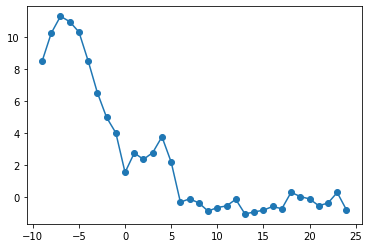

In [14]:
plt.plot(d221['time'],d221['log_evidence'] - d220['log_evidence'],marker='o')

# Collin's result

In [19]:
bf_collin = []
bf_330_220_collin = []
bf_221_220_collin = []
t_collin = []

for i in arange(0,24):
    bf330 = d330.loc[d330['time']==i]['log_evidence'].values
    bf220 = d220.loc[d220['time']==i]['log_evidence'].values
    bf221 = d221.loc[d221['time']==i]['log_evidence'].values
    tc_now = tc_collin+i*1e-3
    th1_now = convert_H1(3.5,0.73,tc_now)
    t_collin.append(th1_now)
    bf_collin.append(bf330-max(bf220,bf221))
    bf_330_220_collin.append(bf330-bf220)
    bf_221_220_collin.append(bf221-bf220)

Text(0.5, 0, 'H1 time')

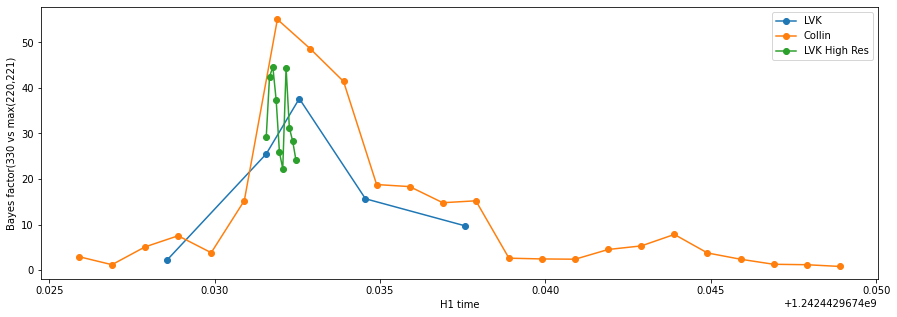

In [20]:
plt.figure(figsize=[15,5])
plt.plot(th1,np.exp(bf),marker='o',label='LVK')
plt.plot(t_collin,np.exp(bf_collin),marker='o',label='Collin')
plt.plot(high_th1,np.exp(high_bf),marker='o',label='LVK High Res')
plt.legend()
plt.ylabel('Bayes factor(330 vs max(220,221)')
plt.xlabel('H1 time')

In [24]:
np.exp(high_bf)

array([29.13948622, 42.43801543, 44.616482  , 37.37204837, 25.84511626,
       22.29608927, 44.43243624, 31.20073209, 28.31663251, 24.10311648])

Text(0.5, 0, 'H1 time')

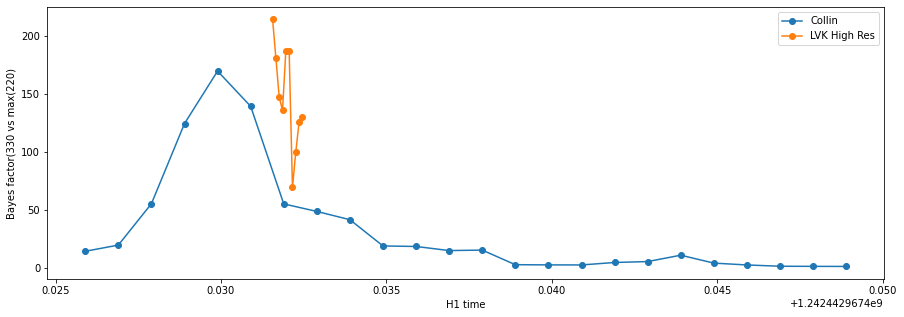

In [23]:
plt.figure(figsize=[15,5])
#plt.plot(th1,np.exp(bf),marker='o',label='LVK')
plt.plot(t_collin,np.exp(bf_330_220_collin),marker='o',label='Collin')
plt.plot(high_th1,np.exp(high_bf_330_220),marker='o',label='LVK High Res')
plt.legend()
plt.ylabel('Bayes factor(330 vs 220)')
plt.xlabel('H1 time')

# Zoom in

Text(0.5, 0, 'H1 time')

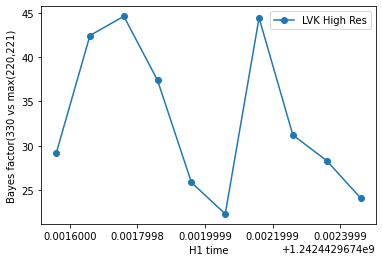

In [39]:
plt.plot(high_th1,np.exp(high_bf),marker='o',label='LVK High Res')
plt.legend()
plt.ylabel('Bayes factor(330 vs max(220,221)')
plt.xlabel('H1 time')

Text(0.5, 0, 'H1 time')

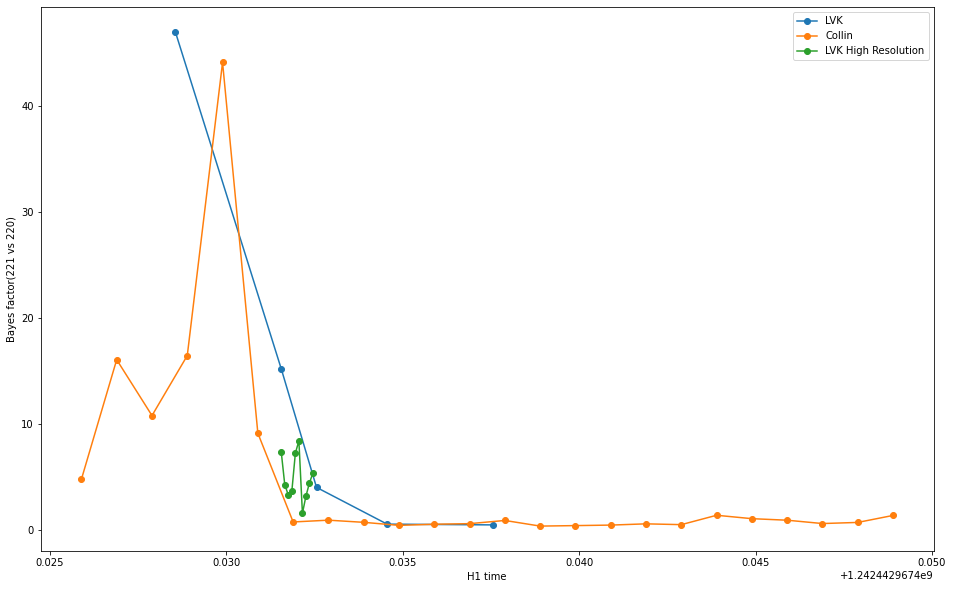

In [44]:
plt.figure(figsize=[16,10])
plt.plot(th1,np.exp(bf_221_220),marker='o',label='LVK')
plt.plot(t_collin,np.exp(bf_221_220_collin),marker='o',label='Collin')
plt.plot(high_th1,np.exp(high_bf_221_220),marker='o',label='LVK High Resolution')
plt.legend()
plt.ylabel('Bayes factor(221 vs 220)')
plt.xlabel('H1 time')